In [1]:
#!/usr/bin/python
# Augmentation
# Does augmentation on images and saves the augmented pics, augmented pics with bounding boxes and xml files
# to the dir with the pics
import imageio
import imgaug as ia
import numpy as np
import imgaug.augmenters as iaa
import cv2
import glob
import os
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
#import duplicatePics as dp
import duplicatePics2 as dp2
import augmentation_r_bbs as au
import getBbsFromXml as xml2bbs
import createXmlFiles as crXml

# Path to the dir with pics (always the complete path)
paths = ['C:/Users/go697/Documents/Augmentation/images/Nlabelled/test/']

# path to the existing Xml files for the not augmented pics
pathToXml = ("C:/Users/go697/Documents/Augmentation/images/labelled/test1/")

# number of duplicates
numD = 3
# save
save_aug_pics = 0;
save_with_bbs = 0;
save_xml      = 0;

for p in paths:
        
    # get pics from path
    instr = []
    images_names = []
    for filename in glob.glob(p + "*.jpg"):
        image = imageio.imread(filename)
        instr.append(image)
        image_name = filename[len(p):len(filename)-4]
        images_names.append(image_name)
        
    # get bbs from xml
    bbs = xml2bbs.getBbsFromXml(pathToXml)
    
    # images for augmentation
    images = instr;
        
    # duplication
    images_d = dp2.duplicatePics2(images, numD)
    bbs_d = dp2.duplicatePics2(bbs, numD)
    images_names_d = dp2.duplicatePics2(images_names, numD)

    # augmentation
    images_aug, bbs_aug = au.augmentation(images_d, bbs_d)
    
################################  SAVE  ########################################
    
    # Save augmented Images
    if save_aug_pics:     
        # create dir for saving. Saves in the same dir in the folder "augm"
        if os.path.exists(p + "augm/") == 0:
            os.mkdir(p + "augm/")
        # saving
        for i in range(len(images_aug)):
            cv2.imwrite(p + "augm/" + images_names_d[i] + "_aug" + str(i%numD+1) +".jpg", images_aug[i])
            
    # Save Images with drawed Boxes
    if save_with_bbs:
        # create dir for saving. Saves in the same dir in the folder "withBbs"
        if os.path.exists(p + "withBbs/") == 0:
            os.mkdir(p + "withBbs/")
        
        # saving
        #images_with_bbs = []
        for i in range (len(images_aug)):
            image_with_bbs  = bbs_aug[i].draw_on_image(images_aug[i], size=5)
            cv2.imwrite(p + "withBbs/" + images_names_d[i] + "_aug" + str(i%numD+1) +".jpg", image_with_bbs)
            #images_with_bbs.append(image_with_bbs)
            
    # Create and xml files
    # saves in the same dir in the folder "xmlFiles"
    crXml.createXmlFiles(pathToXml, p, images_aug, bbs_aug, images_names_d, numD)

In [105]:
# save xml files



In [9]:
#tree.write('../images/labelled/cat3.xml')

#ia.imshow(ia.draw_grid(images_aug))

crXml.createXmlFiles(pathToXml, p, images_aug, bbs_aug, images_names_d, numD)



In [28]:
#ia.imshow(ia.draw_grid(image_aug))

# sup = bbs_aug[6].remove_out_of_image().clip_out_of_image()
# sup_shifted = sup.shift(y=-10)
# sup_shifted3 = sup_shifted2.shift(y=-10)
# sup_shifted2 = sup_shifted1.remove_out_of_image().clip_out_of_image()

In [96]:
type((round(3.42)))
int(round(bbs_aug[i][0].x1))

352

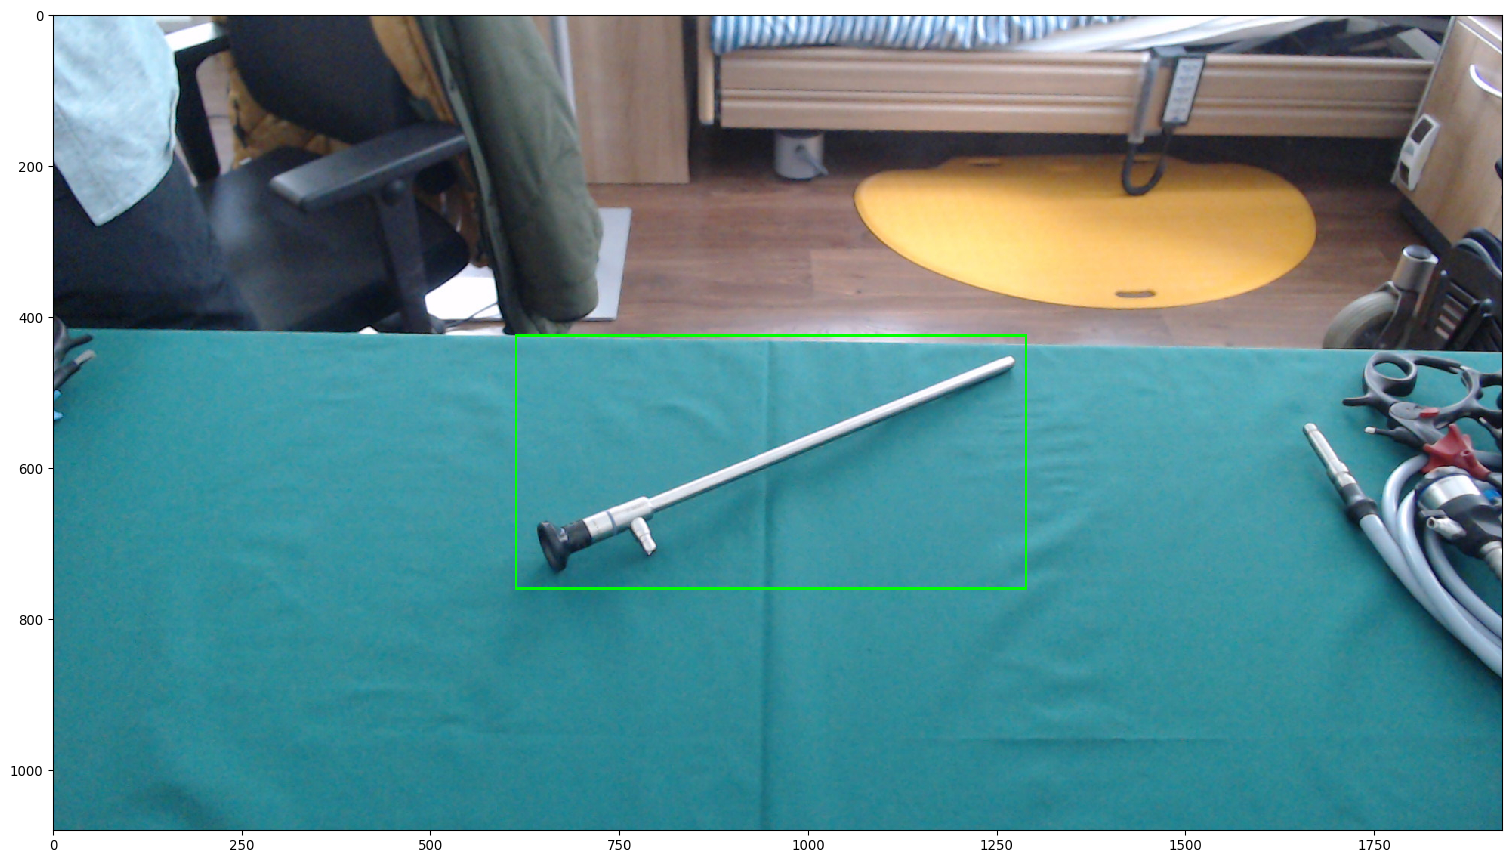

In [29]:
n = 10;
image_no_bbs = bbs_d[n].draw_on_image(images_d[n], size=3)
ia.imshow(image_no_bbs)

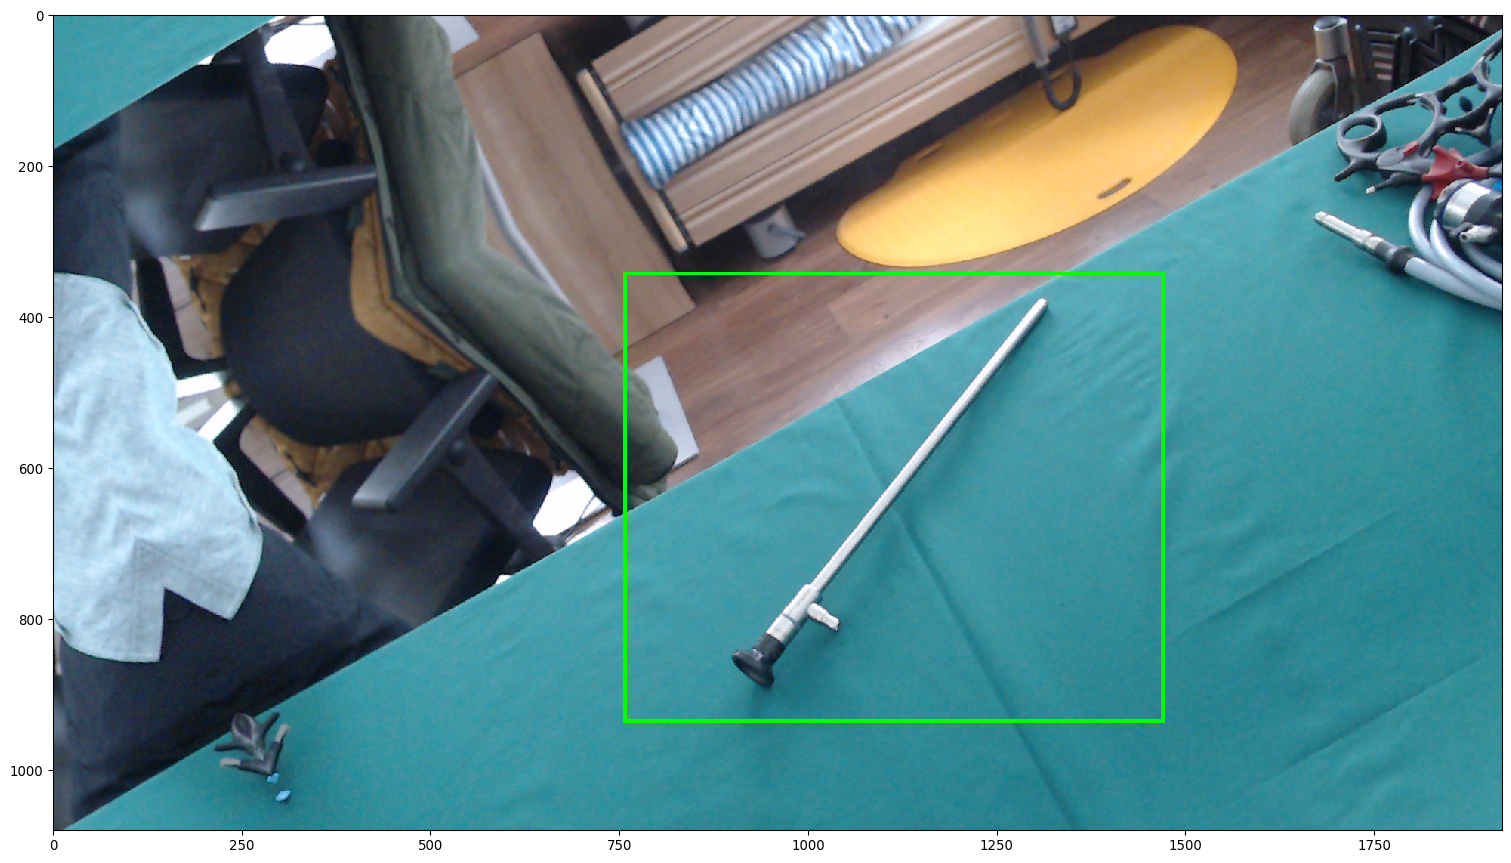

In [30]:
q = 10;
image_with_bbs = bbs_aug[q].draw_on_image(images_aug[q], size=5)
ia.imshow(image_with_bbs)